# Video Processing

## Import Libraries 

In [146]:
import os
import json

from tqdm import tqdm
from pathlib import Path
import cv2
import matplotlib.pyplot as plt
from skimage.metrics import structural_similarity as ssim

In [2]:
root_dir = Path.cwd().parent.parent
root_dir

PosixPath('/mnt/d/Projects_D/Brand_Extractor')

## Data

In [8]:
data_dir = root_dir / 'data' / 'video_preprocessing'
data_dir

PosixPath('/mnt/d/Projects_D/Brand_Extractor/data/video_preprocessing')

In [9]:
frames_dir = data_dir / 'frames'
frames_dir

PosixPath('/mnt/d/Projects_D/Brand_Extractor/data/video_preprocessing/frames')

In [18]:
videos_list = os.listdir(frames_dir)
videos_list

['tanishq_mishra_vlogs_lulu_mall', 'the_explorer_raj_dlf_mall']

In [11]:
video = videos_list[0]
video

'tanishq_mishra_vlogs_lulu_mall'

In [32]:
video_dir = frames_dir / video
frames_data_file = video_dir / 'frame_data.json'

In [33]:
with open(frames_data_file, 'r') as f:
    frames_data = json.load(f)

In [34]:
frames_data.keys()

dict_keys(['video', 'fps', 'total_frames', 'width', 'height', 'sample_fps', 'frames', 'sample_frames'])

In [35]:
frames_data["frames"][:2]

[{'frame': '0000',
  'frame_file': '/mnt/d/Projects_D/Brand_Extractor/data/video_preprocessing/frames/tanishq_mishra_vlogs_lulu_mall/images/0000.png',
  'frame_timestamp': 0.0},
 {'frame': '0001',
  'frame_file': '/mnt/d/Projects_D/Brand_Extractor/data/video_preprocessing/frames/tanishq_mishra_vlogs_lulu_mall/images/0001.png',
  'frame_timestamp': 1.0}]

## Visualize Frames

In [97]:
def display_frames(frame_data: list[dict]):
    # Display frames
    frame_list = []
    for frame_info in frame_data:
        frame = cv2.imread(frame_info['frame_file'])
        # Add frame index and frame_timestamp to the image
        frame = cv2.putText(frame, f"Frame Index: {frame_info['frame']}", (10, 30), cv2.FONT_HERSHEY_SIMPLEX, 1, (0, 255, 255), 2, cv2.LINE_AA)
        frame = cv2.putText(frame, f"Frame Timestamp: {frame_info['frame_timestamp']}", (10, 60), cv2.FONT_HERSHEY_SIMPLEX, 1, (0, 255, 255), 2, cv2.LINE_AA)
        
        frame_list.append(frame)

    plt.figure(figsize=(20,20))
    for i, frame in enumerate(frame_list):
        plt.subplot(5, 3, i+1)
        plt.imshow(cv2.cvtColor(frame, cv2.COLOR_BGR2RGB))
        plt.axis('off')
   

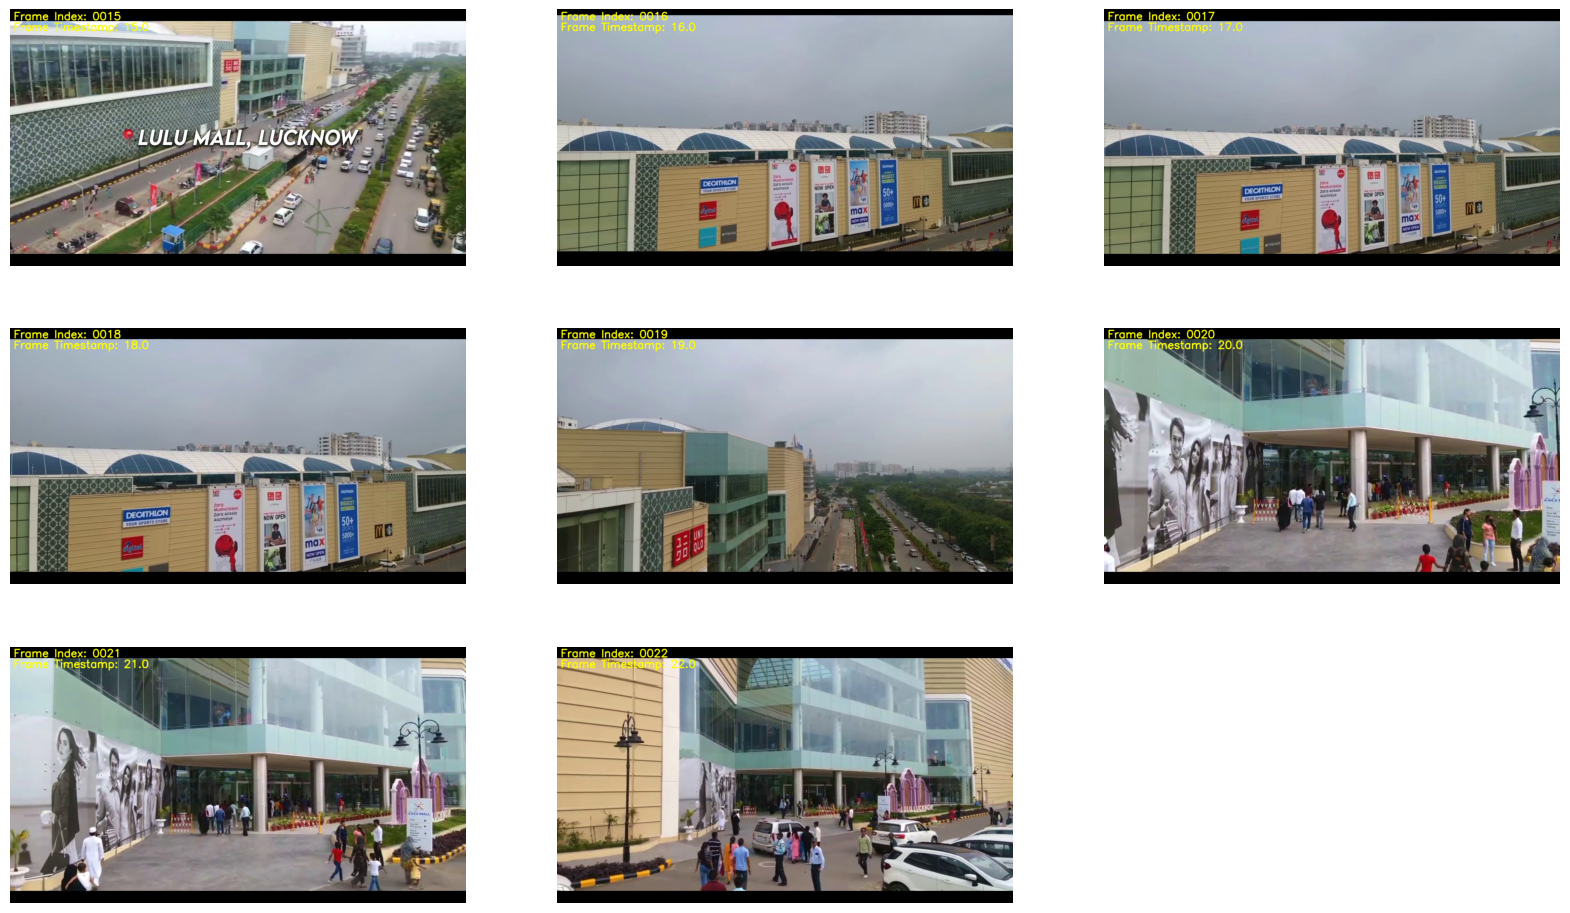

In [98]:
display_frames(frames_data["frames"][25:33])

## Find similar consecutive frames

In [147]:
def find_similar_frames(frame_data: list[dict], threshold: float = 0.9):
    similar_frames = []
    for i in tqdm(range(len(frame_data)-1)):
        frame1 = cv2.imread(frame_data[i]['frame_file'])
        frame2 = cv2.imread(frame_data[i+1]['frame_file'])
        # Convert the frames to grayscale
        frame1_gray = cv2.cvtColor(frame1, cv2.COLOR_BGR2GRAY)
        frame2_gray = cv2.cvtColor(frame2, cv2.COLOR_BGR2GRAY)
        # Calculate the Structural Similarity Index (SSI) between the frames
        (score, _) = ssim(frame1_gray, frame2_gray, full=True)
        if score > threshold:
            similar_frames.append((frame_data[i], frame_data[i+1], score))

    return similar_frames

In [148]:
similar_frames = find_similar_frames(frames_data["frames"], threshold=0.7)

100%|██████████| 1209/1209 [02:53<00:00,  6.96it/s]


In [149]:
len(similar_frames)

36

Frame Index: 1110 and Frame Index: 1111 are similar with a score of 0.7143108146661764


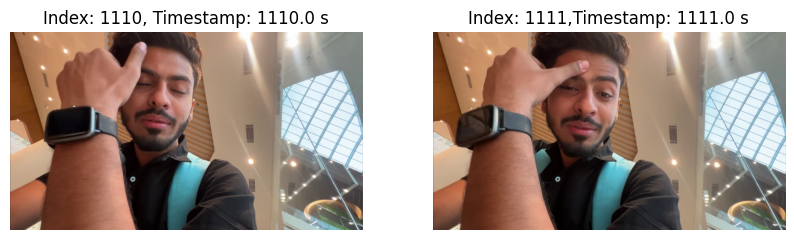

Frame Index: 1111 and Frame Index: 1112 are similar with a score of 0.7109266673156467


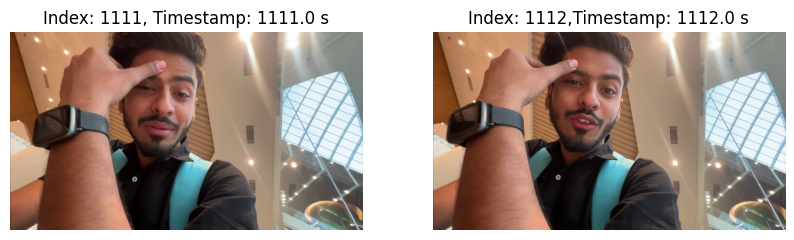

Frame Index: 1116 and Frame Index: 1117 are similar with a score of 0.7073452035737234


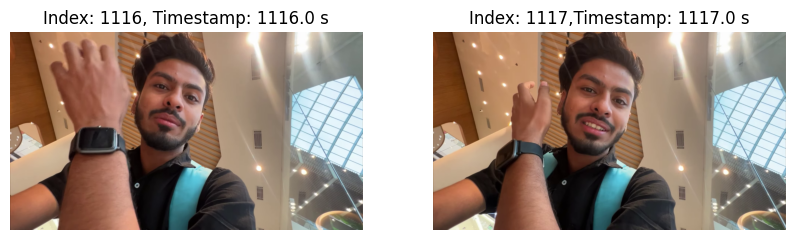

Frame Index: 1178 and Frame Index: 1179 are similar with a score of 1.0


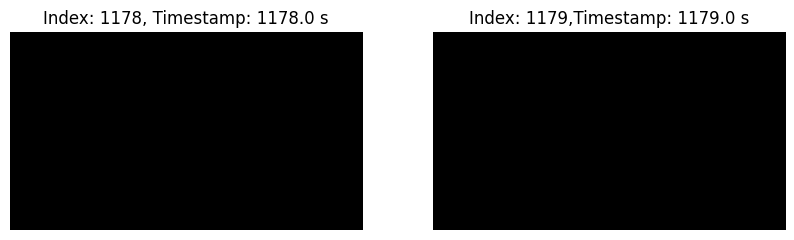

Frame Index: 1194 and Frame Index: 1195 are similar with a score of 0.7000622938198291


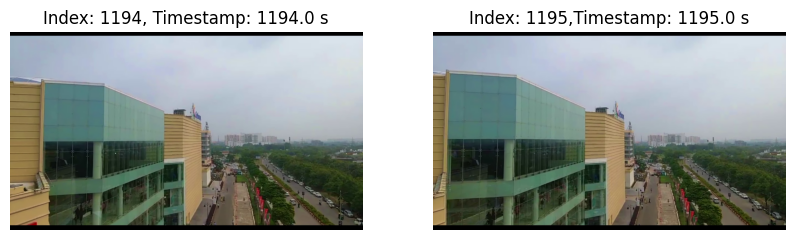

In [153]:
for frame1, frame2, score in similar_frames[-5:]:
    print(f"Frame Index: {frame1['frame']} and Frame Index: {frame2['frame']} are similar with a score of {score}")
    plt.figure(figsize=(10,10))
    plt.subplot(1, 2, 1)
    plt.title(f"Index: {frame1['frame']}, Timestamp: {frame1['frame_timestamp']} s")
    plt.imshow(cv2.cvtColor(cv2.imread(frame1['frame_file']), cv2.COLOR_BGR2RGB))
    plt.axis('off')
    plt.subplot(1, 2, 2)
    plt.title(f"Index: {frame2['frame']},Timestamp: {frame2['frame_timestamp']} s")
    plt.imshow(cv2.cvtColor(cv2.imread(frame2['frame_file']), cv2.COLOR_BGR2RGB))
    plt.axis('off')
    plt.show()

## End